# 1. import reviews

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.utils.multiclass import unique_labels

#visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pal = sns.color_palette()
from wordcloud import WordCloud, STOPWORDS


In [44]:
train_all_happy= pd.read_csv("hotel_happy_reviews.csv")
train_all_happy.head()

,User_ID,Description,Is_Response,hotel_ID
0,id10329,Stayed here with husband and sons on the way t...,happy,8
1,id10331,We had - rooms. One was very nice and clearly ...,happy,3
2,id10333,My wife & I stayed in this glorious city a whi...,happy,3
3,id10334,My boyfriend and I stayed at the Fairmont on a...,happy,7
4,id10336,"Steps off Times Square, nice rooms, stayed - n...",happy,3


In [45]:
train_all_happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26521 entries, 0 to 26520
Data columns (total 4 columns):
User_ID        26521 non-null object
Description    26521 non-null object
Is_Response    26521 non-null object
hotel_ID       26521 non-null int64
dtypes: int64(1), object(3)
memory usage: 828.9+ KB


In [46]:
train_all_not_happy= pd.read_csv("hotel_not_happy_reviews.csv")
train_all_not_happy.head()

,User_ID,Description,Is_Response,hotel_ID
0,id10326,The room was kind of clean but had a VERY stro...,not happy,3
1,id10327,I stayed at the Crown Plaza April -- - April -...,not happy,9
2,id10328,I booked this hotel through Hotwire at the low...,not happy,3
3,id10330,My girlfriends and I stayed here to celebrate ...,not happy,3
4,id10332,My husband and I have stayed in this hotel a f...,not happy,7


In [47]:
train_all_not_happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12411 entries, 0 to 12410
Data columns (total 4 columns):
User_ID        12411 non-null object
Description    12411 non-null object
Is_Response    12411 non-null object
hotel_ID       12411 non-null int64
dtypes: int64(1), object(3)
memory usage: 387.9+ KB


In [48]:
train_all = pd.concat([train_all_happy, train_all_not_happy], axis=0)
train_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38932 entries, 0 to 12410
Data columns (total 4 columns):
User_ID        38932 non-null object
Description    38932 non-null object
Is_Response    38932 non-null object
hotel_ID       38932 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.5+ MB


In [49]:
# split the data into traindf and testdf as 0.8,0.2
train_df, test_df = train_test_split(train_all, test_size=0.2)
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31145 entries, 17946 to 20946
Data columns (total 4 columns):
User_ID        31145 non-null object
Description    31145 non-null object
Is_Response    31145 non-null object
hotel_ID       31145 non-null int64
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


,hotel_ID
count,31145.000000
mean,5.011174
std,2.446356
min,1.000000
25%,3.000000
50%,5.000000
75%,7.000000
max,10.000000


Happy: 68.18429924546476%
Not Happy: 31.815700754535236%


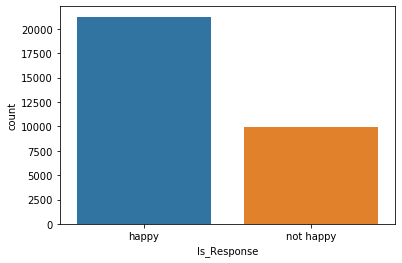

In [50]:
#Display percentage of distribution of data between the two target classes

happy_percent = train_df['Is_Response'].value_counts()['happy']/train_df['Is_Response'].count()
not_happy_percent = train_df['Is_Response'].value_counts()['not happy']/train_df['Is_Response'].count()
print(f'Happy: {happy_percent*100}%\nNot Happy: {not_happy_percent*100}%')

sns.countplot(train_df['Is_Response'])

# 2. Preprocess Data

In [51]:
train_df.drop(columns=['User_ID', 'hotel_ID'], inplace=True)

In [52]:
# clean the txt data 
def text_clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[""''_]', '', text)
    text = re.sub('\n', '', text)
    return text

In [53]:
# clean the txt data 

def decontract_text(text):
    """
    Decontract text
    """
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"won\’t", "will not", text)
    text = re.sub(r"can\’t", "can not", text)
    text = re.sub(r"\'t've", " not have", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'clock", "f the clock", text)
    text = re.sub(r"\'cause", " because", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)

    text = re.sub(r"n\’t", " not", text)
    text = re.sub(r"\’re", " are", text)
    text = re.sub(r"\’s", " is", text)
    text = re.sub(r"\’d", " would", text)
    text = re.sub(r"\’ll", " will", text)
    text = re.sub(r"\’t", " not", text)
    text = re.sub(r"\’ve", " have", text)
    text = re.sub(r"\’m", " am", text)
    
    return text

In [54]:
train_df['cleaned_description'] = train_df['Description'].apply(lambda x: decontract_text(x))
train_df['cleaned_description'] = train_df['cleaned_description'].apply(lambda x: text_clean(x))
train_df.head()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Description,Is_Response,cleaned_description
17946,This is my -th time at the SF. Second time her...,happy,this is my th time at the sf second time here ...
2804,I just moved back to Chicago after a few years...,happy,i just moved back to chicago after a few years...
279,The service was great.But The rooms were nothi...,not happy,the service was greatbut the rooms were nothin...
1581,Istayed at this hotel for business. At checkin...,not happy,istayed at this hotel for business at checking...
10321,My family and I stayed here as part of a tour ...,not happy,my family and i stayed here as part of a tour ...


In [55]:
print('Original Description:\n', train_df['Description'][0])
print('\n\nCleaned Description:\n', train_df['cleaned_description'][0])

Original Description:
 0    Stayed here with husband and sons on the way t...
0    The room was kind of clean but had a VERY stro...
Name: Description, dtype: object


Cleaned Description:
 0    stayed here with husband and sons on the way t...
0    the room was kind of clean but had a very stro...
Name: cleaned_description, dtype: object


(-0.5, 1439.5, 1079.5, -0.5)

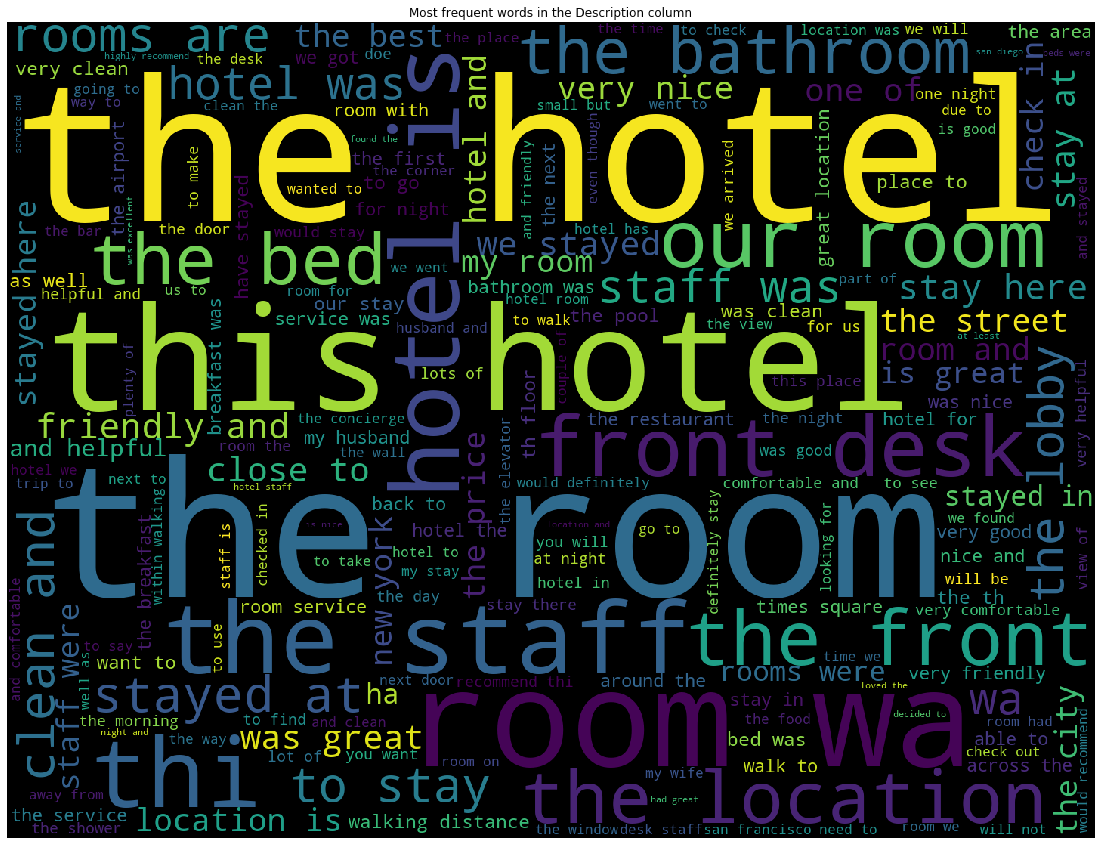

In [56]:
# Most frequent Description words

train_desc = pd.Series(train_df['cleaned_description'].tolist()).astype(str)
cloud = WordCloud(width=1440, height=1080,stopwords=STOPWORDS).generate(" ".join(train_desc.astype(str)))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.title("Most frequent words in the Description column")
plt.axis('off')


In [63]:
train_happy = pd.Series(train_all_happy['Description'].tolist()).astype(str)
train_not_happy = pd.Series(train_all_not_happy['Description'].tolist()).astype(str)

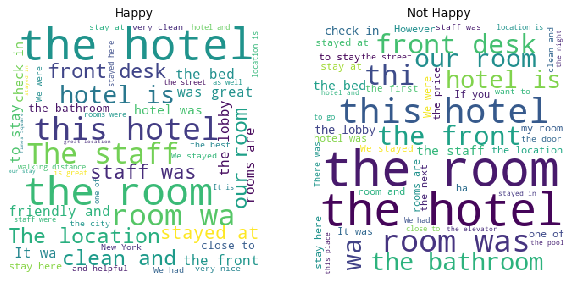

In [64]:
cloud_happy = WordCloud(background_color="white",max_words=50,width=300, height=300,stopwords=STOPWORDS).generate(" ".join(train_happy.astype(str)))
cloud_not_happy = WordCloud(background_color="white",max_words=50,width=300, height=300,stopwords=STOPWORDS).generate(" ".join(train_not_happy.astype(str)))

fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
ax = axes[0]
ax.imshow(cloud_happy)
ax.set_title("Happy")
ax.axis('off')

ax = axes[1]
ax.imshow(cloud_not_happy)
ax.set_title("Not Happy")
ax.axis('off')

plt.show()

#Top 6 words for happy reviews:
hotel
room
staff
location 
clean
front desk


In [ ]:
#Top 6 words for unhappy reviews:
hotel
room
bathroom
front desk 

In [57]:
x, y = train_df['cleaned_description'], train_df['Is_Response']

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.1,
                                                    random_state=42)

print(f'x_train: {len(x_train)}')
print(f'x_test: {len(x_test)}')
print(f'y_train: {len(y_train)}')
print(f'y_test: {len(y_test)}')

x_train: 28030
x_test: 3115
y_train: 28030
y_test: 3115


# 3. model 

In [58]:
# using a tfid vectorizer for extracting the features by converting the cleaned
# text to a matrix of TF-IDF features
tvec = TfidfVectorizer()
clf = LogisticRegression(solver='lbfgs', max_iter=1000)

model = Pipeline([('vectorizer', tvec), ('classifier', clf)])


In [59]:
model.fit(x_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=1000))])

In [60]:
y_pred = model.predict(x_test)

print(f'Accurcy: {accuracy_score(y_pred, y_test)}')
print(f'Precision: {precision_score(y_pred, y_test, average="weighted")}')
print(f'Recall: {recall_score(y_pred, y_test, average="weighted")}')

Accurcy: 0.880577849117175
Precision: 0.8888522113315803
Recall: 0.880577849117175


# 4. evaluation 

In [61]:
def print_confusion_matrix(confusion_matrix, class_names, figsize = (8,4), fontsize=12, model='clf'):
    """
    Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix,
    as a seaborn heatmap. 
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    heatmap = sns.heatmap(df_cm, annot=True, ax=ax, fmt="d", cmap=plt.cm.Oranges)   
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    plt.show()

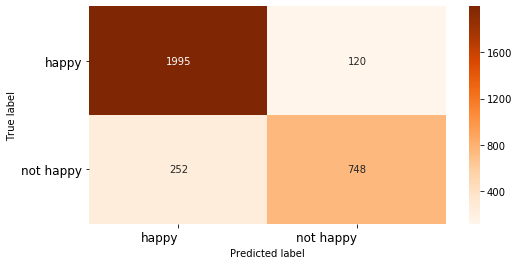

In [62]:
conf_mat = confusion_matrix(y_test, y_pred)
uniq_labels = unique_labels(y_test, y_pred)

print_confusion_matrix(conf_mat, uniq_labels)